# Sales Analysis & Prediction of Oppo Mobiles(Punjab)---2019(Q1)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import math

In [2]:
sales_data = pd.read_csv("SALES-DATA-JAN19-TO-MAR19.csv",encoding = "latin_1")
sales_data.head()

,S.No.,Model,Color,Model Price,IMEI,Activation Date,Sold Date,Reporter Name,E-Code,Department,...,Agent Name,District,City/Town,SE,SSE,TSM,ASM,ZSM,Count,Month
0,1,R17PRO(CPH1877),Radiant Mist,40000,8.610000e+14,1/30/2019,1/30/2019,SANJEEV KUMAR-5664 (LDH),5664,Promoter/OSR,...,18-LDH(D)-BRISK COMMUNICATION- LUDHIANA,LUDHIANA,LUDHIANA,SE VINAY-315(LDH),Vacant-LDH1,TSM HARSHDEEP KAPOOR,ASM MOHIT SHARMA,ZSM RAGHU SETHI,1,Jan'19
1,2,R17PRO(CPH1877),Radiant Mist,40000,8.610000e+14,1/29/2019,1/29/2019,Mamta-HSPR,674,Promoter/OSR,...,16(A)-HSP-DEV MOBILES,HOSHIARPUR,KHUDDA,SE HSP GAGAN TAHIM,Vacant-HSP,VACANT-HSP,ASM NEERAJ,ZSM RAGHU SETHI,1,Jan'19
2,3,R17PRO(CPH1877),Radiant Mist,40000,8.610000e+14,1/25/2019,1/25/2019,PARDEEP KUMAR-1036,1036,Promoter/OSR,...,20-KPT(B)-SAICOM MARKETING,KAPURTHALA,PHAGWADA,SSE SACHIN-3565(PHG),SSE SACHIN-3565(PHG),TSM KUMAR GAURAV,ASM AMIT SRIVASTAVA,ZSM RAGHU SETHI,1,Jan'19
3,4,R17PRO(CPH1877),Radiant Mist,40000,8.610000e+14,1/22/2019,1/22/2019,GURPREET SINGH-3611(PTL),3611,Promoter/OSR,...,09-PTL(A)-CHIRAG SALES PVT.LTD-PATIALA CITY,PATIALA,PATIALA,SE PTL HARPREET SINGH-4070,VACANT-PTL,TSM SHUSHANT-4178(PTL),ASM GURMUKH,ERIC/AHMAD,1,Jan'19
4,5,R17PRO(CPH1877),Radiant Mist,40000,8.610000e+14,1/5/2019,1/6/2019,RAJINDER KUMAR-1328,1328,Promoter/OSR,...,19-LDH(A)-ALLIED MARKETING-LUDHIANA,LUDHIANA,LUDHIANA,SE LDH DAVINDER SINGH,Vacant-LDH1,TSM HARSHDEEP KAPOOR,ASM MOHIT SHARMA,ZSM RAGHU SETHI,1,Jan'19


In [3]:
sales_data.shape

(145582, 24)

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145582 entries, 0 to 145581
Data columns (total 24 columns):
S.No.              145582 non-null int64
Model              145582 non-null object
Color              145582 non-null object
Model Price        145582 non-null int64
IMEI               145582 non-null float64
Activation Date    145582 non-null object
Sold Date          145582 non-null object
Reporter Name      145582 non-null object
E-Code             145582 non-null object
Department         145543 non-null object
Shop Boy           34390 non-null object
Dealer Name        145582 non-null object
Dealer ID          145582 non-null object
Dealer Status      145582 non-null object
Agent Name         145582 non-null object
District           145582 non-null object
City/Town          145582 non-null object
SE                 145572 non-null object
SSE                145575 non-null object
TSM                145582 non-null object
ASM                145582 non-null object
ZSM      

In [5]:
sales_data.describe()

,S.No.,Model Price,IMEI,Count
count,145582.000000,145582.000000,1.455820e+05,145582.0
mean,72791.500000,13053.938873,8.677459e+14,1.0
std,42026.047782,4332.131111,1.857296e+12,0.0
min,1.000000,7490.000000,8.600000e+14,1.0
25%,36396.250000,9990.000000,8.670000e+14,1.0
50%,72791.500000,10990.000000,8.690000e+14,1.0
75%,109186.750000,14000.000000,8.690000e+14,1.0
max,145582.000000,59990.000000,8.700000e+14,1.0


In [6]:
sales_data.columns

Index(['S.No.', 'Model', 'Color', 'Model Price', 'IMEI', 'Activation Date',
       'Sold Date', 'Reporter Name ', 'E-Code', 'Department', 'Shop Boy',
       'Dealer Name', 'Dealer ID', 'Dealer Status', 'Agent Name', 'District',
       'City/Town', 'SE', 'SSE', 'TSM', 'ASM', 'ZSM', 'Count', 'Month'],
      dtype='object')

In [7]:
sales_data.isnull().sum()

S.No.                   0
Model                   0
Color                   0
Model Price             0
IMEI                    0
Activation Date         0
Sold Date               0
Reporter Name           0
E-Code                  0
Department             39
Shop Boy           111192
Dealer Name             0
Dealer ID               0
Dealer Status           0
Agent Name              0
District                0
City/Town               0
SE                     10
SSE                     7
TSM                     0
ASM                     0
ZSM                     0
Count                   0
Month                   0
dtype: int64

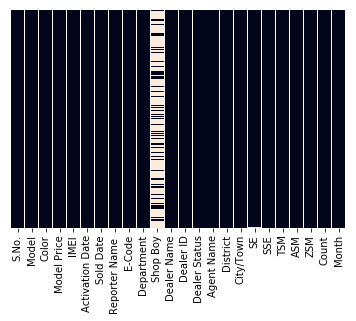

In [8]:
sns.heatmap(sales_data.isnull(),yticklabels=False,cbar=False)

In [9]:
# droping "Shop Boy" feature as most of the values are not there.
sales_data.drop("Shop Boy",axis = 1,inplace = True)

# all departments
sales_data.Department.unique()

array(['Promoter/OSR', 'Senior Sales Executive', 'Shop Boy',
       'SE/TL/Sales man', 'Territory Sales Manager', 'Sales Manager', nan],
      dtype=object)

## handling missing values in "Department"

In [10]:
# to removing the extra space in column name.
sales_data.rename(columns={"Reporter Name ":"Reporter Name"},inplace=True)

dept_reporter_name = sales_data[["Department","Reporter Name"]]
dept_groups = dept_reporter_name.groupby("Department")
dept_groups.head(3)

,Department,Reporter Name
0,Promoter/OSR,SANJEEV KUMAR-5664 (LDH)
1,Promoter/OSR,Mamta-HSPR
2,Promoter/OSR,PARDEEP KUMAR-1036
8,Senior Sales Executive,SSE GAGANDEEP-119(ABH)
12,Shop Boy,SB-SANJAY(LDH)
21,Shop Boy,SB-ANKUSH ARORA(MGA)
23,Shop Boy,SB-NITIKA GARG(BTI)
64,SE/TL/Sales man,SE LDH GOURAV SHARMA-3826
68,Territory Sales Manager,TSM SUSHLENDRA
73,Senior Sales Executive,SO LDH SANDEEP


#### By looking at reporter name, last three NaN values belongs to Shop Boy "Department"

In [11]:
# checking all Reporter name where department is null.
sales_data[sales_data.Department.isnull()]["Reporter Name"]

97241      SB-VARINDER SINGH(JLD)
99870      SB-VARINDER SINGH(JLD)
99877      SB-VARINDER SINGH(JLD)
99893         SB-SUNIL KUMAR(KPT)
99939         SB-SUNIL KUMAR(KPT)
107696     SB-VARINDER SINGH(JLD)
109801     SB-VARINDER SINGH(JLD)
115205    SB-GAGANDEEP KUMAR(FDK)
118287     SB-VARINDER SINGH(JLD)
121100    SB-GAGANDEEP KUMAR(FDK)
121571     SB-VARINDER SINGH(JLD)
125346    SB-GAGANDEEP KUMAR(FDK)
128323    SB-GAGANDEEP KUMAR(FDK)
128328     SB-VARINDER SINGH(JLD)
134921    SB-GAGANDEEP KUMAR(FDK)
135440    SB-GAGANDEEP KUMAR(FDK)
135486     SB-VARINDER SINGH(JLD)
135522        SB-SUNIL KUMAR(KPT)
135639     SB-VARINDER SINGH(JLD)
135826        SB-SUNIL KUMAR(KPT)
135838        SB-SUNIL KUMAR(KPT)
135888        SB-SUNIL KUMAR(KPT)
135908    SB-GAGANDEEP KUMAR(FDK)
137642        SB-SUNIL KUMAR(KPT)
137999        SB-SUNIL KUMAR(KPT)
138000        SB-SUNIL KUMAR(KPT)
138021        SB-SUNIL KUMAR(KPT)
138023        SB-SUNIL KUMAR(KPT)
138049        SB-SUNIL KUMAR(KPT)
138848        

#### All missing values belongs to Shop Boy Department

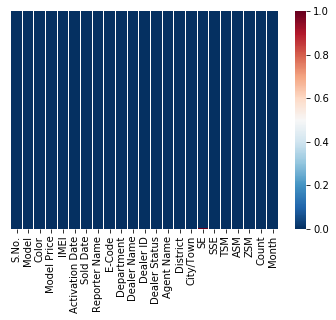

In [12]:
# replacing null values in Department with "Shop Boy" & filling SE & SSE null values
sales_data.Department.replace(np.NaN,"Shop Boy",inplace = True)
sns.heatmap(sales_data.isnull(),yticklabels=False,cmap="RdBu_r")

In [13]:
sales_data.fillna(method = 'bfill',axis = 0,inplace = True)
sales_data.isnull().sum()

S.No.              0
Model              0
Color              0
Model Price        0
IMEI               0
Activation Date    0
Sold Date          0
Reporter Name      0
E-Code             0
Department         0
Dealer Name        0
Dealer ID          0
Dealer Status      0
Agent Name         0
District           0
City/Town          0
SE                 1
SSE                0
TSM                0
ASM                0
ZSM                0
Count              0
Month              0
dtype: int64

In [14]:
sales_data[sales_data.SE.isnull()]

,S.No.,Model,Color,Model Price,IMEI,Activation Date,Sold Date,Reporter Name,E-Code,Department,...,Agent Name,District,City/Town,SE,SSE,TSM,ASM,ZSM,Count,Month
145581,145582,A71K(CPH1801),Blue,9990,8.700000e+14,3/9/2019,10/13/2018,DEEPAK-4952 (FZR),4952,Promoter/OSR,...,04(B)-ABH-RAJAN ENTERPRISES- JALALABAD,ABOHAR,ABOHAR,NaN,VACANT-ABH,TSM GAGAN GARG,ASM PARAMJIT SINGH,ZSM BALJEET GHUMMAN,1,Mar'19


In [15]:
sales_data.fillna(method = 'ffill',axis = 0,inplace = True)
sales_data.isna().sum()

S.No.              0
Model              0
Color              0
Model Price        0
IMEI               0
Activation Date    0
Sold Date          0
Reporter Name      0
E-Code             0
Department         0
Dealer Name        0
Dealer ID          0
Dealer Status      0
Agent Name         0
District           0
City/Town          0
SE                 0
SSE                0
TSM                0
ASM                0
ZSM                0
Count              0
Month              0
dtype: int64

# Monthly analysis & prediction

Monthly Sales Count:
Jan'19: 52850 |Feb'19: 44125 |Mar'19: 48607

Monthly Revenue(In Cr.):
Jan'19: 66.96 |Feb'19: 55.82 |Mar'19: 67.26



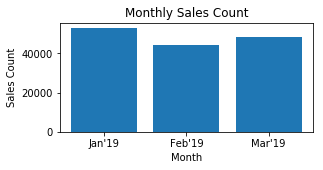

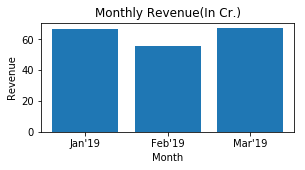

In [16]:
# Starting with Monthly sales

# getting monthly qty.
monthly_sales_count = sales_data.groupby('Month')
month_count = monthly_sales_count.count().iloc[:,0]
months = pd.DataFrame({"Mt":[2,1,3]},index = month_count.index)
months['Count'] = month_count
months.sort_values("Mt",axis=0,inplace = True)
print("Monthly Sales Count:\nJan'19: {} |Feb'19: {} |Mar'19: {}\n".format(months["Count"][0],months["Count"][1],months["Count"][2]))

# getting monthly volume (Revenue)
monthly_sales_vol = pd.DataFrame({"Mt":[2,1,3]},index = month_count.index)
vol_list = [float("%0.2f" % (x/10000000)) for x in np.array(sales_data.groupby('Month').sum()["Model Price"])]
monthly_sales_vol["Revenue"] = vol_list
monthly_sales_vol.sort_values("Mt",axis = 0,inplace=True)
print("Monthly Revenue(In Cr.):\nJan'19: {} |Feb'19: {} |Mar'19: {}\n".format(monthly_sales_vol["Revenue"][0],monthly_sales_vol["Revenue"][1],monthly_sales_vol["Revenue"][2]))

plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.bar(x = months.index,height = months['Count'])
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title("Monthly Sales Count")

plt.figure(figsize=(10,2))
plt.subplot(1,2,2)
plt.bar(x = monthly_sales_vol.index,height = monthly_sales_vol['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title("Monthly Revenue(In Cr.)")
plt.show()

#### In Mar'19, Sales count is less but revenue is high.

Count: 
 Jan: 52850 |Feb: 44125 |Mar: 48607|Apr: 44284|May: 42162|Jun: 40041
Revenue(Cr.): 
 Jan: 66.96 |Feb: 55.82 |Mar: 67.26|Apr: 63.65|May: 63.8|Jun: 63.95


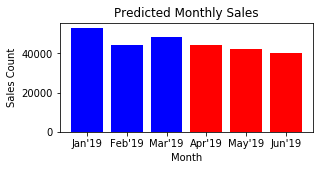

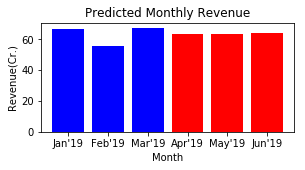

In [17]:
def lin_regr(x,y,pre):
    lin_reg = LinearRegression()
    lin_reg.fit(x,y)
    prediction = lin_reg.predict([[pre]])
    return float("%0.2f" % prediction)

new_months = list(months.index)
new_months.extend(["Apr'19","May'19","Jun'19"])
count_l = list(months.Count)
revenue_l = list(monthly_sales_vol.Revenue)
for i in range(4,7):
    count_l.append(math.floor(lin_regr(months[['Mt']],months[['Count']],i)))
    revenue_l.append(lin_regr(monthly_sales_vol[['Mt']],monthly_sales_vol[['Revenue']],i))
print("Count: \n Jan: {} |Feb: {} |Mar: {}|Apr: {}|May: {}|Jun: {}".format(count_l[0],count_l[1],count_l[2],count_l[3],count_l[4],count_l[5]))
print("Revenue(Cr.): \n Jan: {} |Feb: {} |Mar: {}|Apr: {}|May: {}|Jun: {}".format(revenue_l[0],revenue_l[1],revenue_l[2],revenue_l[3],revenue_l[4],revenue_l[5]))

plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.bar(x = new_months,height = count_l,color = ["blue","blue","blue","red","red","red"])
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title("Predicted Monthly Sales")

plt.figure(figsize=(10,2))
plt.subplot(1,2,2)
plt.bar(x = new_months,height = revenue_l,color = ["blue","blue","blue","red","red","red"])
plt.xlabel('Month')
plt.ylabel('Revenue(Cr.)')
plt.title("Predicted Monthly Revenue")
plt.show()

In [18]:
# grouping model price into price range.
price_range = []
for i in sales_data["Model Price"]:
    if i<10000:
        price_range.append("<10K")
    elif i>=10000 and i<15000:
        price_range.append(">10K and <15K")
    elif i>=15000 and i<20000:
        price_range.append(">15K and <20K")
    elif i>=20000 and i<25000:
        price_range.append(">20K and <25K")
    elif i>=25000 and i<30000:
        price_range.append(">25K and <30K")
    elif i>=30000 and i<35000:
        price_range.append(">30K and <35K")
    elif i>=35000 and i<40000:
        price_range.append(">35K and <40K")
    elif i>=40000 and i<45000:
        price_range.append(">40K and <45K")
    elif i>=45000 and i<50000:
        price_range.append(">45K and <50K")
    elif i>=50000:
        price_range.append(">50K")
    else:
        price_range.append("NA")
    
sales_data.insert(4,"Price Range",price_range)


In [19]:
price_range_contr = sales_data.pivot_table(index = "Price Range",aggfunc="count")['Count']
price_range_contr

Price Range
<10K             41160
>10K and <15K    80928
>15K and <20K     8881
>20K and <25K    14467
>40K and <45K      138
>50K                 8
Name: Count, dtype: int64

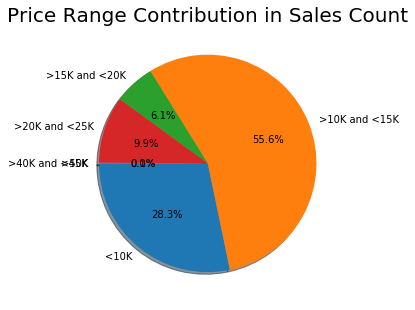

In [20]:
plt.figure(figsize = (5,5))
plt.pie(price_range_contr[0:],shadow=True,labels=price_range_contr.index,startangle=180,autopct='%1.1f%%',radius=1)
plt.title("Price Range Contribution in Sales Count",fontsize=20)
plt.show()

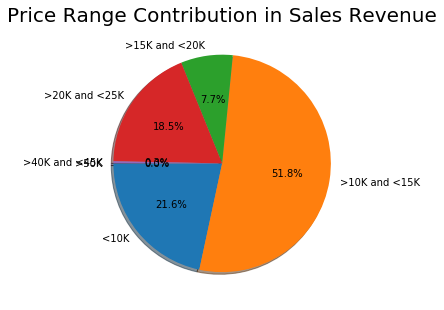

In [21]:
rev_price_range = sales_data.pivot_table(index = "Price Range",aggfunc="sum")["Model Price"]
plt.figure(figsize = (5,5))
plt.pie(rev_price_range.iloc[0:],shadow=True,labels=rev_price_range.index,startangle=180,autopct='%1.1f%%',radius=1)
plt.title("Price Range Contribution in Sales Revenue",fontsize=20)
plt.show()

In [22]:
monthly_SalesCount_PR = sales_data.pivot_table(index = "Price Range",columns="Month",aggfunc="count")["Count"]
monthly_SalesCount_PR

Month,Feb'19,Jan'19,Mar'19
Price Range,,,
<10K,14140.0,13300.0,13720.0
>10K and <15K,24534.0,30747.0,25647.0
>15K and <20K,2305.0,4719.0,1857.0
>20K and <25K,3095.0,4013.0,7359.0
>40K and <45K,50.0,64.0,24.0
>50K,1.0,7.0,NaN


In [23]:
monthly_Rev_PR = sales_data.pivot_table(index = "Month",aggfunc="sum")["Model Price"]
final_data = monthly_SalesCount_PR.transpose()
final_data.fillna(0,inplace=True)
final_data["Total Revenue"] = monthly_Rev_PR
final_data.insert(0,"Mt",[2,1,3])
final_data.sort_values("Mt",axis = 0,inplace = True)
final_data

Price Range,Mt,<10K,>10K and <15K,>15K and <20K,>20K and <25K,>40K and <45K,>50K,Total Revenue
Month,,,,,,,,
Jan'19,1,13300.0,30747.0,4719.0,4013.0,64.0,7.0,669570605
Feb'19,2,14140.0,24534.0,2305.0,3095.0,50.0,1.0,558240468
Mar'19,3,13720.0,25647.0,1857.0,7359.0,24.0,0.0,672607456


In [24]:
X = final_data.iloc[:,:-1].values
Y = final_data.iloc[:,-1:].values

In [25]:
month_lin_reg = LinearRegression()
month_lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
dict_month = dict({1:"Jan'19",2:"Feb'19",3:"Mar'19",4:"Apr'19",5:"May'19",6:"Jun'19",7:"Jul'19",8:"Aug'19",9:"Sep'19",10:"Oct'19",11:"Nov'19",12:"Dec'19"})
enter = "Enter projected model count for the month"
check = True
while check:
    try:
        mt = int(input("Enter Month (1 to 12):"))
        if mt > 12:
            raise Exception()
        Below_10K = int(input(enter+"(Below 10K)"))
        Bw_10K_15K = int(input(enter+"(Between 10K and 15K)"))
        Bw_15K_20K = int(input(enter+"(Between 15K and 20K)"))
        Bw_20K_25K = int(input(enter+"(Between 20K and 25K)"))
        Bw_40K_45K = int(input(enter+"(Between 40K and 45K)"))
        Above_50K = int(input(enter+"(Above 50K)"))
        temp_l = [mt,Below_10K,Bw_10K_15K,Bw_15K_20K,Bw_20K_25K,Bw_40K_45K,Above_50K]
        check = False
    except:
        print("Invalid Input! Please enter only numeric values...")
print("Predicted Revenue for {} month is {} Cr.".format(dict_month[(temp_l[0])],"%0.2f"%(month_lin_reg.predict([temp_l])/10000000)))

Enter Month (1 to 12):5
Enter projected model count for the month(Below 10K)12900
Enter projected model count for the month(Between 10K and 15K)30450
Enter projected model count for the month(Between 15K and 20K)4500
Enter projected model count for the month(Between 20K and 25K)4600
Enter projected model count for the month(Between 40K and 45K)67
Enter projected model count for the month(Above 50K)7
Predicted Revenue for May'19 month is 68.01 Cr.
